In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

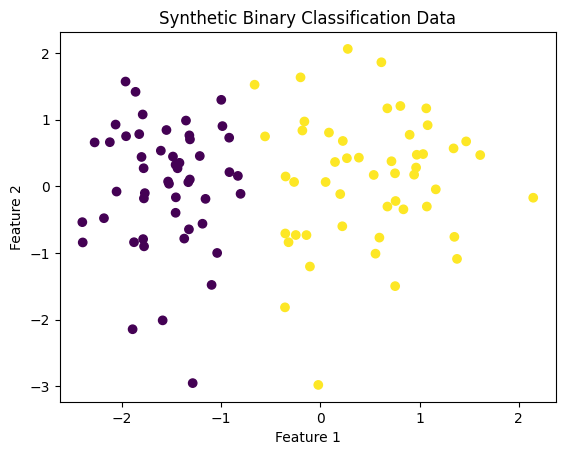

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Data')
plt.show()

In [3]:
def perceptron(X, y, learning_rate=0.1, n_iterations=1000):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.zeros(X.shape[1])

    for _ in range(n_iterations):
        for i in range(X.shape[0]):
            linear_output = np.dot(X[i], weights)
            y_predicted = 1 if linear_output >= 0 else 0
            update = learning_rate * (y[i] - y_predicted)
            weights += update * X[i]

    return weights[0], weights[1:]  # Return weights and bias

In [4]:
def step_function(z):
    return 1 if z >= 0 else 0

In [5]:
intercept_, coef_ = perceptron(X, y)

In [6]:
print("Learned coefficients:", coef_)
print("Learned intercept:", intercept_)

Learned coefficients: [0.86449384 0.06049573]
Learned intercept: 0.7


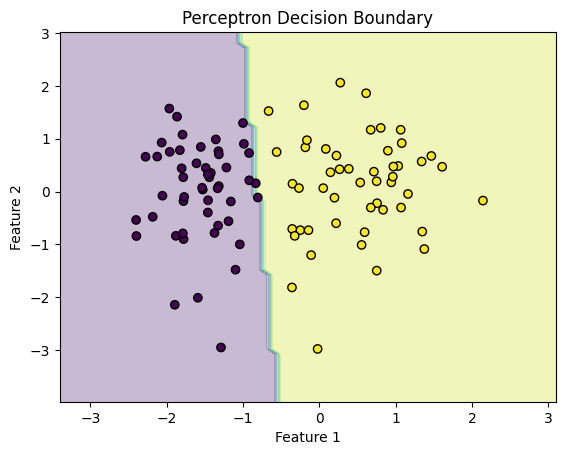

In [7]:
# Visualize decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = np.array([step_function(coef_[0] * x + coef_[1] * y + intercept_) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.show()

In [8]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

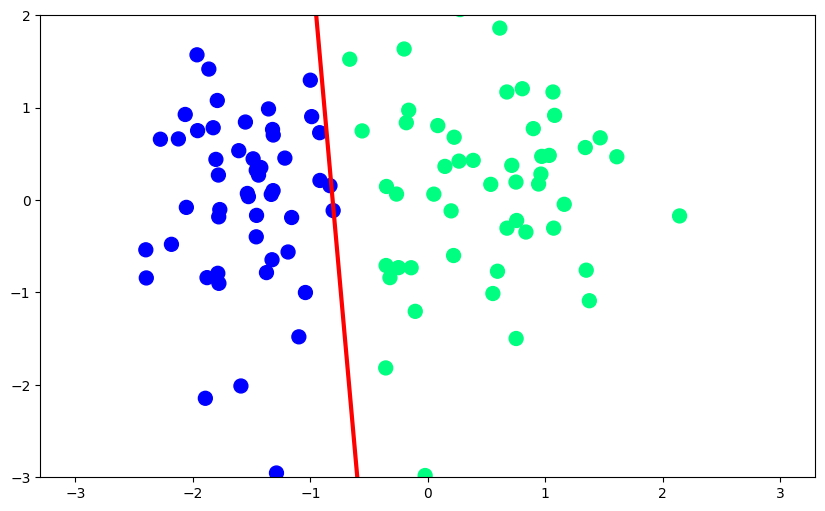

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [11]:
import matplotlib
matplotlib.get_backend()


'module://matplotlib_inline.backend_inline'